# Kadai2  CIFAR10
## Import 

In [1]:
'''ライブラリの準備'''
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader

/bin/sh: 1: max_split_size_mb:128: not found


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


## Hyper Parameter

In [3]:
'''ハイパーパラメータの宣言'''
num_epochs = 10
batch_size = 64
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
transform = transforms.Compose([
    transforms.RandomAffine([0,30], scale=(0.8, 1.2)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
input = 3
hide1 = 16
hide2 = 16
output = 10
kernel_size = 5
padding = 2

num_epochs = 10
batch_size = 64
input = 3
hide1 = 16
hide2 = 16
output = 10
kernel_size = 5
padding = 2

## Dataset

In [4]:
'''Datasetの準備'''
train_set = CIFAR10(root='mydata', train=True, transform=transform, download=True)
test_set = CIFAR10(root='mydata', train=False, transform=transform, download=True)
'''DataLoaderを作成'''
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=4)
test_loader = DataLoader(test_set, batch_size=len(test_set), shuffle=False, num_workers=4)

Files already downloaded and verified
Files already downloaded and verified


## CIFAR10 check

Files already downloaded and verified


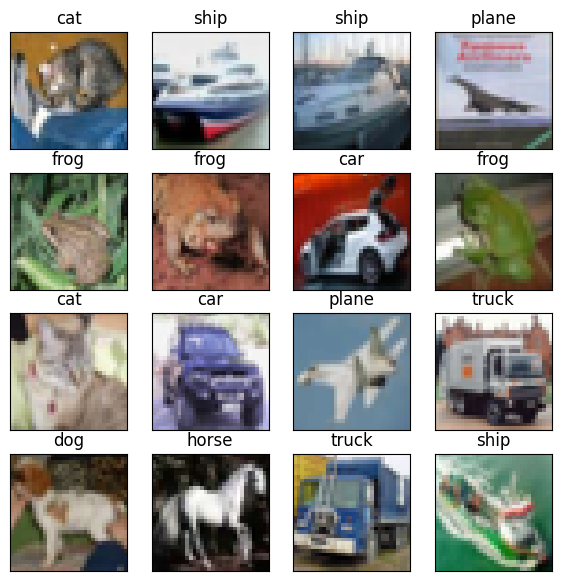

In [5]:
'''データの確認'''
cifar10 = CIFAR10(root="mydata", train=False, transform=transforms.ToTensor(), download=True)
plt.figure(figsize=(7,7))
chkimages, chklabels = next(iter(DataLoader(cifar10, batch_size=4*4)))
for i in range(4*4):
    plt.subplot(4,4,i+1)
    label = classes[chklabels[i]]
    plt.title(label)
    t_chkimages = np.transpose(chkimages[i], (1, 2, 0))
    plt.imshow(t_chkimages)
    plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
plt.show()

## Model set up

In [6]:
class CNN(nn.Module):
    def __init__(self,input,hide1,hide2,output,kernel_size,padding):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(input, hide1, kernel_size=kernel_size, padding=padding),
            nn.BatchNorm2d(hide1),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(hide1, hide2, kernel_size=5, padding=2),
            nn.BatchNorm2d(hide2),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(8 * 8 * hide2, output)
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN(input,hide1,hide2,output,kernel_size,padding).to(device)

criterion = nn.CrossEntropyLoss()
lr = 0.01
#optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

  optimizers['SGD'] = optim.SGD(params, lr=0.1)  
  optimizers['Adagrad'] = optim.Adagrad(params, lr)  
  optimizers['RMSprop'] = optim.RMSprop(params, lr)  
  optimizers['Adadelta'] = optim.Adadelta(params, lr)  
  optimizers['Adam'] = optim.Adam(params, lr)  
  optimizers['AdamW'] = optim.AdamW(params, lr)  

## Train and Evaluation function

In [7]:
'''訓練用の関数を定義'''
def train(train_loader):
    model.train()
    running_loss = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        loss.backward()
        optimizer.step()
    train_loss = running_loss / len(train_loader)
    return train_loss
'''評価用の関数を定義'''
def valid(test_loader):
    model.eval()
    running_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for i, (images, labels) in enumerate(test_loader):
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            predicted = outputs.max(1, keepdim=True)[1]
            correct += predicted.eq(labels.view_as(predicted)).sum().item() # 先の例で説明済み
            total += labels.size(0)
    val_loss = running_loss / len(test_loader)
    val_acc = correct / total
    return val_loss, val_acc

## Train function

In [8]:
'''誤差(loss)を記録する空の配列を用意'''
loss_list = []
val_loss_list = []
val_acc_list = []
'''学習'''
for epoch in range(num_epochs):
    loss = train(train_loader)
    val_loss, val_acc = valid(test_loader)
    print('epoch %d, loss: %.4f val_loss: %.4f val_acc: %.4f' % (epoch, loss, val_loss, val_acc))
    loss_list.append(loss)
    val_loss_list.append(val_loss)
    val_acc_list.append(val_acc)

epoch 0, loss: 1.6481 val_loss: 1.4159 val_acc: 0.4919
epoch 1, loss: 1.3837 val_loss: 1.3695 val_acc: 0.5111
epoch 2, loss: 1.2929 val_loss: 1.2785 val_acc: 0.5459
epoch 3, loss: 1.2535 val_loss: 1.2387 val_acc: 0.5608
epoch 4, loss: 1.2190 val_loss: 1.2258 val_acc: 0.5656
epoch 5, loss: 1.2064 val_loss: 1.2171 val_acc: 0.5708
epoch 6, loss: 1.1935 val_loss: 1.2300 val_acc: 0.5608
epoch 7, loss: 1.1650 val_loss: 1.1758 val_acc: 0.5851
epoch 8, loss: 1.1593 val_loss: 1.1494 val_acc: 0.5928
epoch 9, loss: 1.1447 val_loss: 1.1109 val_acc: 0.6108


In [9]:
print('criterion: nn.MSELoss, loss: %.4f, val_acc: %.4f'%(loss,val_acc))

criterion: nn.MSELoss, loss: 1.1447, val_acc: 0.6108


## Model Save

In [10]:
'''学習の結果と使用したモデルを保存'''
np.save('loss_list.npy', np.array(loss_list))
np.save('val_loss_list.npy', np.array(val_loss_list))
np.save('val_acc_list.npy', np.array(val_acc_list))
torch.save(model.state_dict(), 'cnn.pkl')

## Result

正解率： 61.08 %


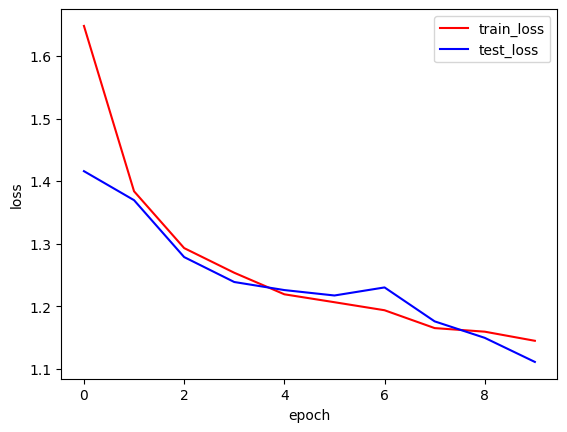

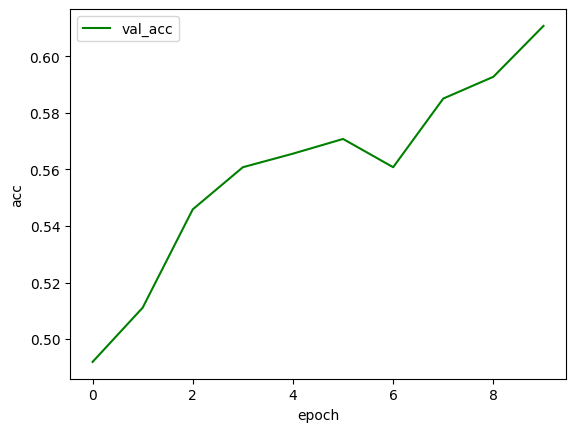

In [11]:
'''結果の表示'''
plt.plot(range(num_epochs), loss_list, 'r-', label='train_loss')
plt.plot(range(num_epochs), val_loss_list, 'b-', label='test_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.figure()
plt.plot(range(num_epochs), val_acc_list, 'g-', label='val_acc')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('acc')
print('正解率：',val_acc_list[-1]*100, '%')

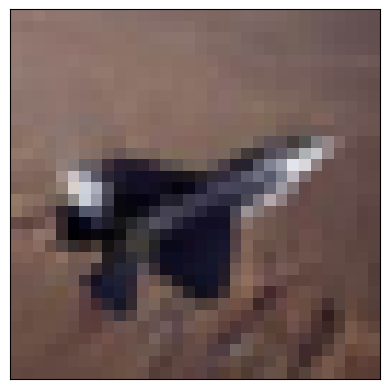

正解: plane 予測結果: plane


In [12]:
'''訓練済みモデルで精度を検証'''
images, labels = next(iter(DataLoader(cifar10, shuffle=True)))
img = np.transpose(images[0], (1, 2, 0))
plt.imshow(img)
plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
plt.show()
lab = model(images.to(device))
print("正解:", classes[labels[0]], "予測結果:", classes[lab.argmax(1).item()])

## hide   
隠れ層の入力と出力のサイズを変更．  
サイズを大きくするほど、正答率は高くなる．  

hide1: 2, hide2: 2, loss: 1.6549, val_acc: 0.4013  
hide1: 4, hide2: 4, loss: 1.4655, val_acc: 0.4777  
hide1: 8, hide2: 8, loss: 1.2893, val_acc: 0.5462  
hide1: 16, hide2: 16, loss: 1.1821, val_acc: 0.5817  
hide1: 32, hide2: 32, loss: 1.0568, val_acc: 0.6347  
hide1: 64, hide2: 64, loss: 0.9994, val_acc: 0.6474

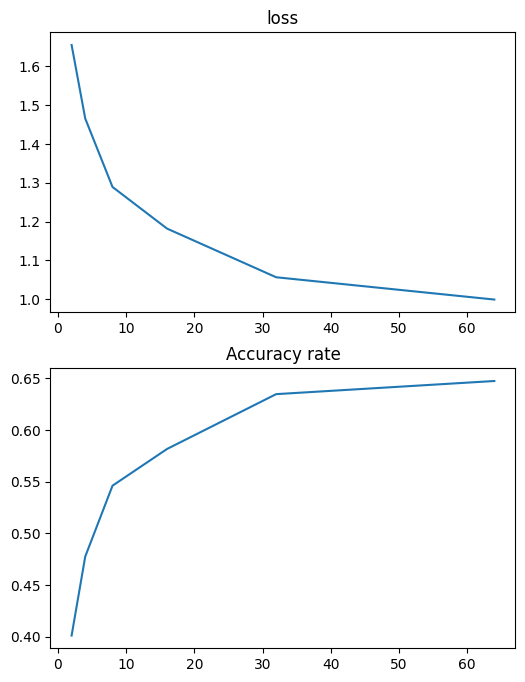

In [3]:
hide = np.loadtxt('parameter/hide_para.csv',delimiter=",")
hide = hide.transpose()
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(2,1,1)
ax1.plot(hide[0],hide[1])
ax1.set_title('loss')
ax2 = fig.add_subplot(2,1,2)
ax2.plot(hide[0],hide[2])
ax2.set_title('Accuracy rate')
plt.show()

## batch_size   
batch_sizeの値を変更．　  
batch_sizeが少なすぎる場合，正答率が下がるが，　　  
sizeが十分っである場合，頭打ちになる．  

batch_size: 2, loss: 1.7225, val_acc: 0.3879  
batch_size: 16, loss: 1.2932, val_acc: 0.5508  
batch_size: 64, loss: 1.1664, val_acc: 0.5979  
batch_size: 128, loss: 1.1447, val_acc: 0.5925  
batch_size: 256, loss: 1.1223, val_acc: 0.5859

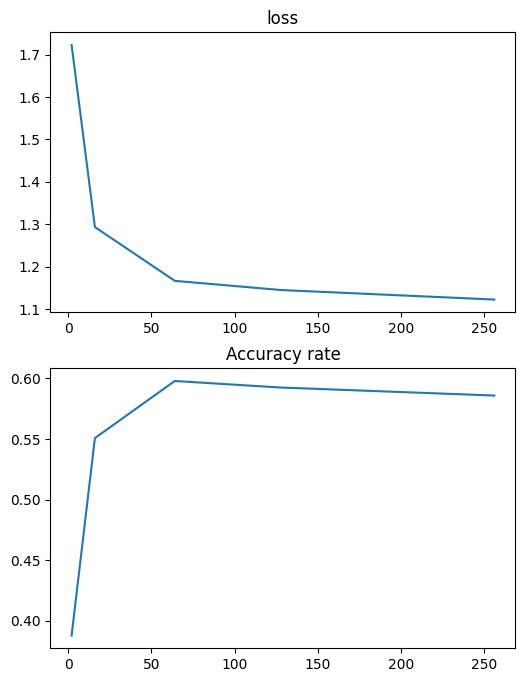

In [4]:
batch_size = np.loadtxt('parameter/batch_size.csv',delimiter=",")
batch_size = batch_size.transpose()
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(2,1,1)
ax1.plot(batch_size[0],batch_size[1])
ax1.set_title('loss')
ax2 = fig.add_subplot(2,1,2)
ax2.plot(batch_size[0],batch_size[2])
ax2.set_title('Accuracy rate')
plt.show()

## kernal  
kernal_sizeを変更． 
kernal_sizeを変更しても，あまり正答率に変化はなかった．

kernal: 2, loss: 1.1646, val_acc: 0.5877   
kernal: 3, loss: 1.1484, val_acc: 0.5813  
kernal: 4, loss: 1.1539, val_acc: 0.5970    
kernal: 5, loss: 1.1560, val_acc: 0.5856  

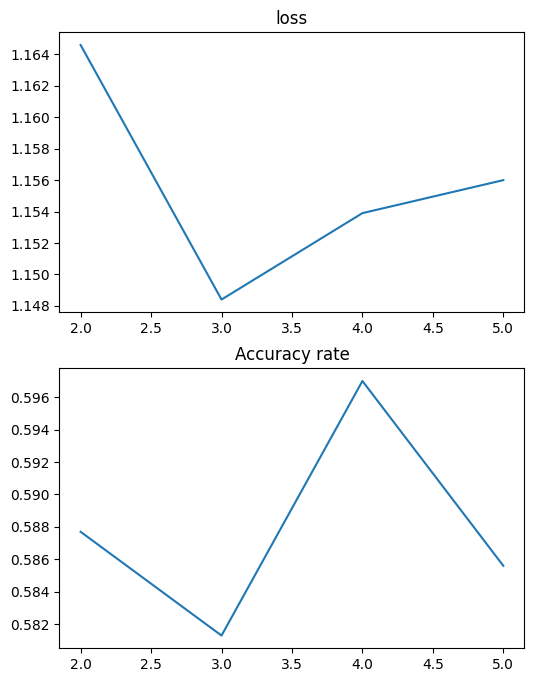

In [5]:
kernel_size = np.loadtxt('parameter/kernel_size.csv',delimiter=",")
kernel_size = kernel_size.transpose()
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(2,1,1)
ax1.plot(kernel_size[0],kernel_size[1])
ax1.set_title('loss')
ax2 = fig.add_subplot(2,1,2)
ax2.plot(kernel_size[0],kernel_size[2])
ax2.set_title('Accuracy rate')
plt.show()

## padding
paddingの値を変更しようとしたが，変更できるサイズがあまり多くなかったため以下の２パターンのみである．  
また，正答率にはあまり影響を与えていないと考える．  

padding: 2, loss: 1.1599, val_acc: 0.5883  
padding: 3, loss: 1.1581, val_acc: 0.5935

## Learning rate
Learning rateの変更を行なった．  
lrの値を小さくすると，ステップ幅が小さくなるので正答率が高くなり，  
値を大きくするほど正答率が低くなる．  

lr: 0.001, loss: 1.1028, val_acc: 0.6106  
lr: 0.005, loss: 1.1046, val_acc: 0.5924  
lr: 0.01, loss: 1.1366, val_acc: 0.5940  
lr: 0.02, loss: 1.2512, val_acc: 0.5616  
lr: 0.04, loss: 1.6571, val_acc: 0.3809  
lr: 0.08, loss: 2.3100, val_acc: 0.1000  
lr: 0.10, loss: 2.3122, val_acc: 0.1000  

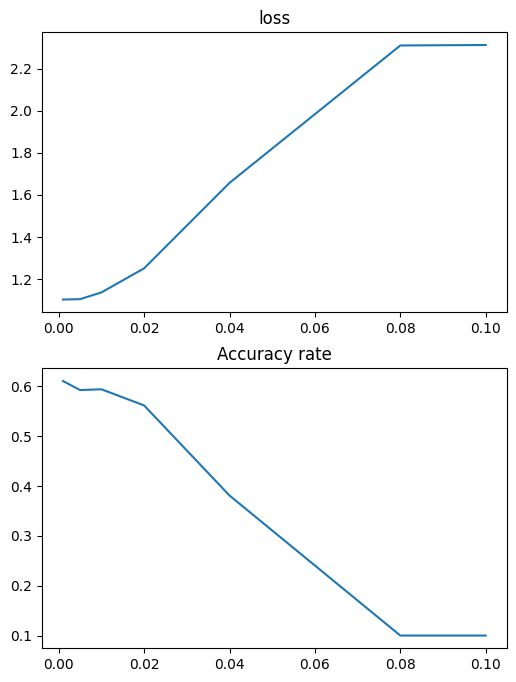

In [6]:
learningrate = np.loadtxt('parameter/learningrate.csv',delimiter=",")
learningrate = learningrate.transpose()
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(2,1,1)
ax1.plot(learningrate[0],learningrate[1])
ax1.set_title('loss')
ax2 = fig.add_subplot(2,1,2)
ax2.plot(learningrate[0],learningrate[2])
ax2.set_title('Accuracy rate')
plt.show()

## optimaizer  
それぞれのoptimaizerを変更．  
大きな差は出なかったが，今回の結果ではAdagrad,Adamを使用するのが最も効率が良いと考える．  

optimazer: SDG, loss: 1.1526, val_acc: 0.5551  
optimazer: Adagrad, loss: 1.1647, val_acc: 0.5891  
optimazer: RMSprop, loss: 1.1878, val_acc: 0.5589  
optimazer: Adadelta, loss: 1.4436, val_acc: 0.4894  
optimazer: Adam, loss: 1.1628, val_acc: 0.5856  
optimazer: AdamW, loss: 1.1648, val_acc: 0.5725


['1.1526' '1.1647' '1.1878' '1.4436' '1.1628' '1.1648'] ['0.5551' '0.5891' '0.5589' '0.4894' '0.5856' '0.5725']


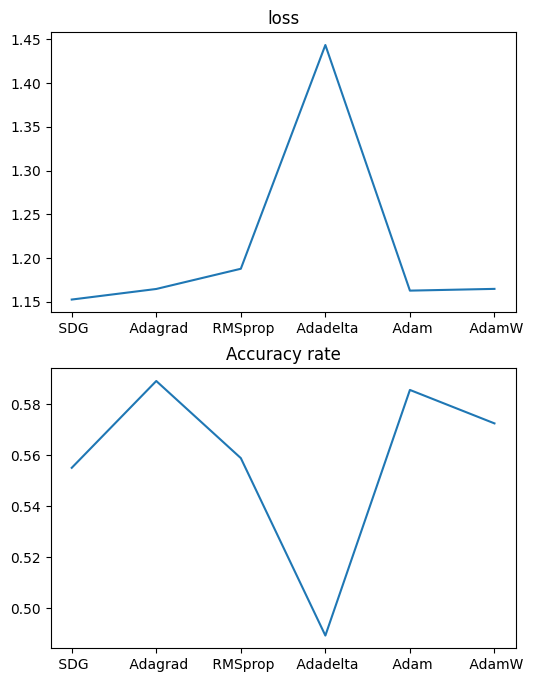

In [17]:
optimaizer = np.loadtxt('parameter/optimaizer.csv',delimiter=",",dtype = "unicode")
optimaizer = optimaizer.transpose()
print(optimaizer[1],optimaizer[2])
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(2,1,1)
ax1.plot(list(range(len(optimaizer[1]))),[float(i) for i in optimaizer[1]])
ax1.set_title('loss')
plt.xticks(list(range(len(optimaizer[1]))),optimaizer[0])
ax2 = fig.add_subplot(2,1,2)
ax2.plot(list(range(len(optimaizer[2]))),[float(i) for i in optimaizer[2]])
ax2.set_title('Accuracy rate')
plt.xticks(list(range(len(optimaizer[1]))),optimaizer[0])
plt.show()

### その他
今回は層の数が２層であり，層の数を変更していないため層を増やすことによる影響は確認していない．    
層を増やすことによって精度は改善する可能性があるが，時間やメモリなどのコストとトレードオフになると考えられる．  
また，今回使用したCNN以外の層を使うことによって改善できる可能性がある．  

## ハイパーパラメータの最適化手法

### グリッドサーチ
グリッドサーチは、探索対象のパラメータ候補を列挙し、その全ての組み合わせを照らし合わせ、最適な組み合わせを見つけ出す探索手法。一番シンプルなパラメータ探索手法．  
全て組み合わせを試行するため、ハイパーパラメータ候補の中で最も良いハイパーパラメータを必ず見つけ出せるが，パラメータの候補数が多い場合、計算量が増大し、最適なパラメータを見つけ出すのに時間がかかる．
上記に加えて学習データが膨大かつモデルが非常に複雑である場合、さらに計算量が増える。結果、時間的理由からグリッドサーチの利用が困難と判断することがある．

### ランダムサーチ
ランダムサーチとは、ハイパーパラメータの組み合わせをランダムに試行し、その中で最適なものを採用するパラメータ自動探索手法．　  
パラメータ探索上限回数を指定できるため、グリッドサーチのように計算量による時間的コストの課題が浮上しずらいが，  
パラメータ探索上限回数を低く設定すれば、最適なパラメータの組み合わせを見逃す確率が上がる  

### ベイズ最適化
ベイズ最適化は、ガウス課程と呼ばれる回帰モデルを利用して、最適なハイパーパラメータの組み合わせを見つけ出す手法.  
最初の探索では広くランダムにパラメータ候補を指定し精度を求める．　.  
続いて、ランダムに求めた精度をもとに、さらに精度が高くなりそうな組み合わせ候補を推定し、精度を計算.  
ランダム探索でパラメータ候補範囲を絞り、精度が上がりそうな観点を重点的に計算していくのがこの手法の特徴.  
計算量による時間的コストの課題が浮上しずらく,最適なハイパーパラメータの組み合わせを効率的に探索できるが，  
ハイパーパラメータに離散値を用いる場合、パラメータ探索効率が落ちる  